# Exploratory Data Analysis (EDA)

### Importar librerías

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

### Cargar resultados

In [2]:
results = pd.read_csv("address_results copy.csv", sep = ',')
results.head()

,Unnamed: 0,retiro,entrega,tamano,opcion_de_entrega,cantidad_de_paquetes,cantidad_de_asistentes,lat_retiro,lng_retiro,lat_entrega,lng_entrega,km,precio
0,47.0,"19 de abril 1213, Montevideo Uruguay","Copacabana 6808, Montevideo Uruguay",small,express,2.0,1.0,-34.844347,-56.250894,-34.883826,-56.046647,19.182770,1692.0
1,25.0,"Eulogio Caballero, Montevideo Uruguay","Copacabana 6808, Montevideo Uruguay",small,express,2.0,1.0,-34.853517,-56.245285,-34.883826,-56.046647,18.470838,1467.0
2,78.0,"Copacabana 6808, Montevideo Uruguay","Carlos Tellier, Montevideo, Uruguay",small,express,2.0,1.0,-34.883826,-56.046647,-34.853517,-56.245285,18.470838,2022.0
3,50.0,"19 de abril 1213, Montevideo Uruguay","Rambla República de México, Montevideo Uruguay",small,express,2.0,1.0,-34.844347,-56.250894,-34.894122,-56.059510,18.349428,1473.0
4,28.0,"Eulogio Caballero, Montevideo Uruguay","Rambla República de México, Montevideo Uruguay",small,express,2.0,1.0,-34.853517,-56.245285,-34.894122,-56.059510,17.572249,1692.0


### Mantener solo columnas necesarias

In [3]:
results = results[["km", "precio"]]
results.head()

,km,precio
0,19.182770,1692.0
1,18.470838,1467.0
2,18.470838,2022.0
3,18.349428,1473.0
4,17.572249,1692.0


### Eliminar filas nulas

In [4]:
print(results.shape)
results = results.dropna()
print(results.shape)

(296, 2)
(252, 2)


### Separar en atributos de entrenamiento y atributo objetivo

In [5]:
def sep():
    print('\n','*'*100,'\n')
    
X = results.loc[:, results.columns != "precio"]
y = results.loc[:, results.columns == "precio"]

### Regresor lineal

In [6]:
reg = LinearRegression().fit(X, y)
print("El R2 de la regresión es: ", reg.score(X, y))
sep()
print("Los coeficientes de la regresión son: ", reg.coef_)
sep()
print("La intercepción de la regresión es: ", reg.intercept_)

El R2 de la regresión es:  0.5861537440694173

 **************************************************************************************************** 

Los coeficientes de la regresión son:  [[48.03331171]]

 **************************************************************************************************** 

La intercepción de la regresión es:  [941.23144629]


### Visualización

Text(0.5, 1.0, 'km vs. precio')

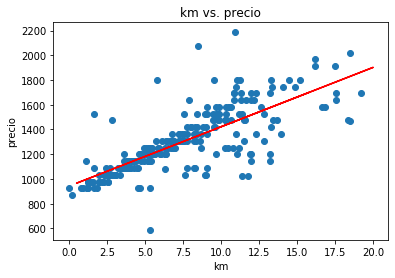

In [10]:
plt.scatter(results.loc[:,'km'],
            results.loc[:,'precio'])

x = np.random.uniform(0.5,20,1000)
pendiente = reg.coef_[0][0]
y = x*pendiente+reg.intercept_[0]

plt.plot(x,y, color = 'r')

plt.xlabel('km')
plt.ylabel('precio')
plt.title('km vs. precio')